<a href="https://colab.research.google.com/github/donkshel002/fraud_detection-/blob/main/Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check the distribution of the 'Class' column
print(data['Class'].value_counts())

Class
0.0    104834
1.0       232
Name: count, dtype: int64


.

start

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# 1. Data Importation and Preprocessing
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Option 1: Remove rows with missing values in y_train
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

In [ ]:
print("Number of missing values in y_train:", np.isnan(y_train).sum())


Number of missing values in y_train: 0


In [ ]:
# 5. Handling Class Imbalance (using SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

.

In [ ]:
# Model Training (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9793641940881205
Precision: 0.07367149758454106
Recall: 0.8591549295774648
F1-Score: 0.135706340378198
ROC AUC: 0.9193731116409489


In [ ]:
from sklearn.model_selection import GridSearchCV

   # Define the hyperparameter grid
param_grid = {
       'C': [0.1, 1, 10],
       'penalty': ['l1', 'l2']
   }

   # Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

   # Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

   # Get the best model
best_model = grid_search.best_estimator_

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Task
Tell me about this dataset.

Here is all the data you need:
"creditcard.csv"

## Data loading

### Subtask:
Load the credit card transaction dataset.


**Reasoning**:
I need to load the credit card transaction dataset into a pandas DataFrame and display the first 5 rows to verify the data.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('creditcard.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data exploration

### Subtask:
Explore the loaded credit card transaction dataset to understand its basic characteristics.


**Reasoning**:
Examine the shape, data types, missing values, and first few rows of the DataFrame to understand its basic characteristics.



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types of each column
print("\nData Types:\n", df.dtypes)

# Look for missing values
print("\nMissing Values per column:\n", df.isnull().sum())

# Display the first few rows
display(df.head())

Shape of the DataFrame: (284807, 31)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data analysis

### Subtask:
Calculate descriptive statistics and analyze the class distribution.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze class distribution, and calculate class-specific means and standard deviations.



In [ ]:
# Calculate descriptive statistics for numerical features
numerical_features = df.drop('Class', axis=1)
descriptive_stats = numerical_features.describe()
display(descriptive_stats)

# Analyze the distribution of the 'Class' variable
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("\nClass Distribution:\n", class_distribution)

# Calculate mean and standard deviation for each class
class_stats = df.groupby('Class').agg(['mean', 'std'])
display(class_stats)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000



Class Distribution:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


Time                      V1                  V2            \
               mean           std      mean       std      mean       std   
Class                                                                       
0      94838.202258  47484.015786  0.008258  1.929814 -0.006271  1.636146   
1      80746.806911  47835.365138 -4.771948  6.783687  3.623778  4.291216   

             V3                  V4            ...       V25            \
           mean       std      mean       std  ...      mean       std   
Class                                          ...                       
0      0.012171  1.459429 -0.007860  1.399333  ... -0.000072  0.520673   
1     -7.033281  7.110937  4.542029  2.873318  ...  0.041449  0.797205   

            V26                 V27                 V28                Amount  \
           mean       std      mean       std      mean       std        mean   
Class                                                                           
0     -0.000089  0.482241 -0.000295  0.399847 -0.000131  0.329570   88.291022   
1      0.051648  0.471679  0.170575  1.376766  0.075667  0.547291  122.211321   

                   
              std  
Class              
0      250.105092  
1      256.683288  

[2 rows x 60 columns]

## Data visualization

### Subtask:
Visualize the data distributions and correlations.


**Reasoning**:
Visualize data distributions, correlations, and class distribution using histograms, heatmaps, and bar charts, and save the visualizations.



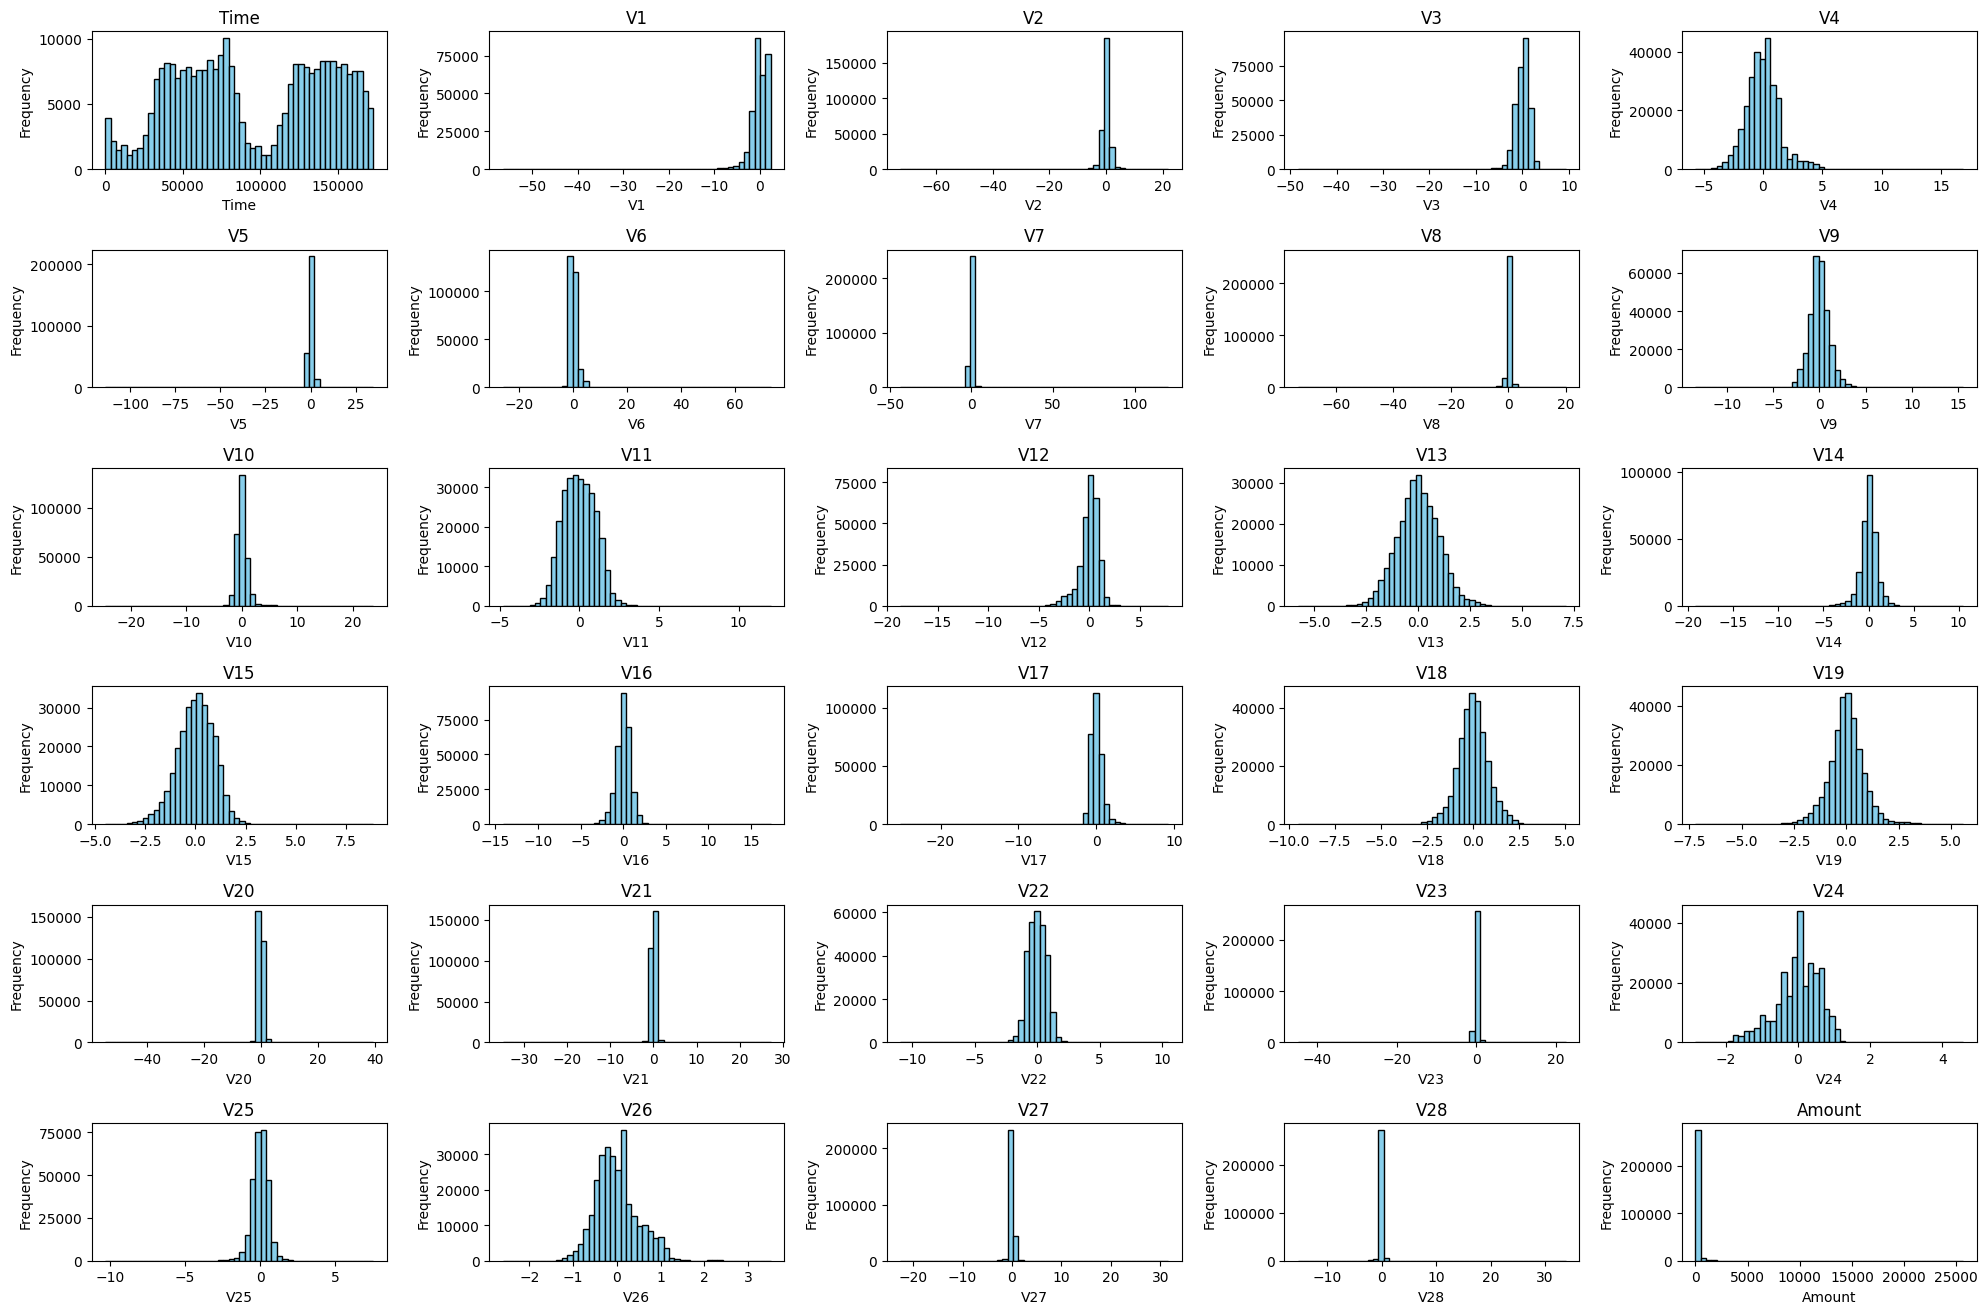

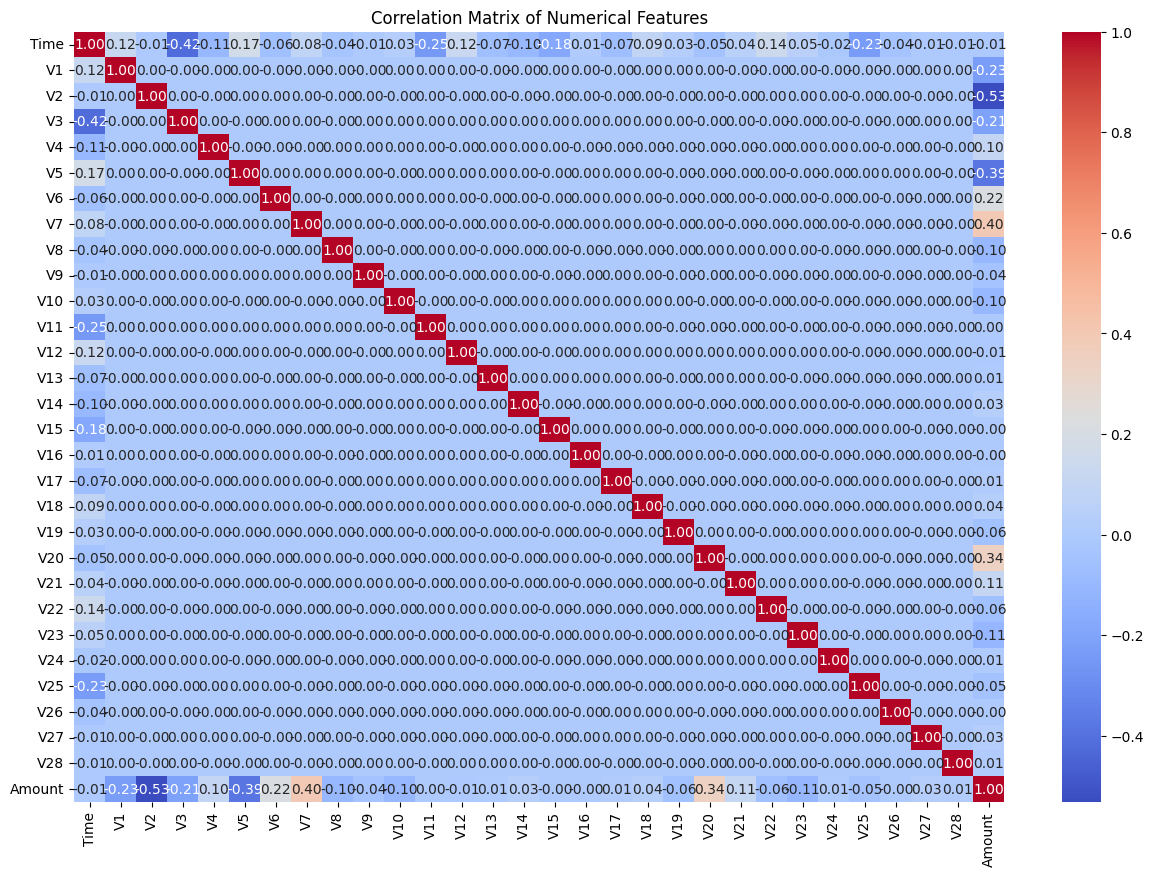

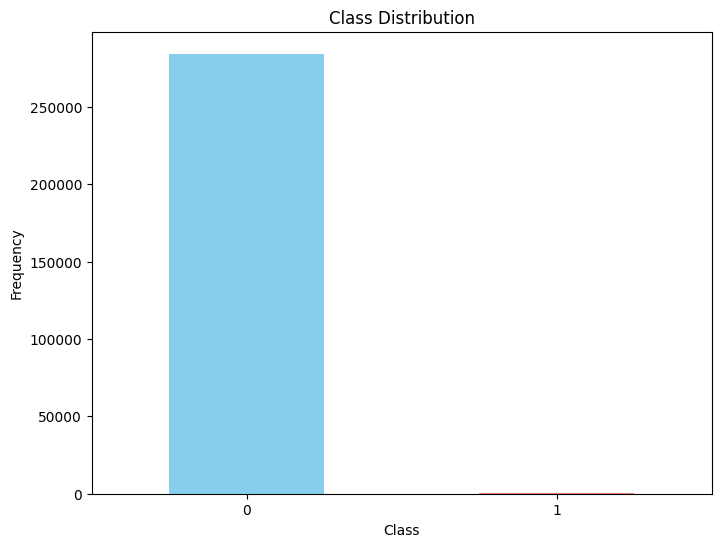

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.drop('Class', axis=1).columns):
    plt.subplot(7, 5, i + 1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.drop('Class', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Class distribution bar chart
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig('class_distribution.png')
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly addresses questions like:

* **What is the structure of the dataset?**  The analysis reveals the number of rows and columns, data types of each column, and the presence of missing values.
* **Are there any missing values?**  The analysis confirms no missing values are present in the dataset.
* **What is the distribution of the target variable ('Class')?**  The analysis shows a significant class imbalance, with a small percentage of fraudulent transactions.
* **How are the numerical features distributed?**  Histograms visualize the distribution of each numerical feature.
* **How are the numerical features correlated?** A correlation matrix heatmap illustrates the relationships between the numerical features.

### 2. Data Analysis Key Findings

* **Class Imbalance:** The dataset exhibits a significant class imbalance in the 'Class' variable, with approximately 99.83% of transactions being non-fraudulent (Class 0) and 0.17% being fraudulent (Class 1). This imbalance needs to be addressed in any subsequent modeling efforts.
* **No Missing Values:**  The dataset contains no missing values across all columns, simplifying preprocessing.
* **Data Types:** All columns are numeric ('Time', 'Amount', and features V1 to V28 are float64; 'Class' is int64).
* **Dataset Size:** The dataset comprises 284,807 transactions and 31 features.


### 3. Insights or Next Steps

* **Address Class Imbalance:**  Given the significant class imbalance, techniques like oversampling the minority class (fraudulent transactions), undersampling the majority class, or using cost-sensitive learning algorithms are crucial for building a robust fraud detection model.
* **Feature Engineering and Selection:** Explore feature engineering techniques to create new features that might better capture fraudulent patterns.  Investigate feature importance based on the correlation matrix and other methods to select the most relevant features for modeling.
